# PCA Practice

## Concepts

#### Give at least two reasons why one might use PCA.  Be sure to include discussion of what problem PCA solves and how.

PCA addresses the 'curse of dimensionality' by reducing the number of features in a dataset used to fit a model. PCA finds the principal components of a dataset, which are vectors that account for variance among the features.

In addition to reducing dimensions, PCA also guarantees that the principal components have no colinearity issues, which also benefits the model being constructed.

In [1]:
# Run as-is
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import pickle as pkl

with open('test_obj/X.pkl', 'rb') as f:
    X = pkl.load(f)

with open('test_obj/y.pkl', 'rb') as f:
    y = pkl.load(f)  

from test_scripts.test_class import Test
test = Test()

## Application

### Data Exploration

- Turn `X` (a np array of features) into a dataframe.  
    - How many features are there? 
    - How many observations are there?

- Turn `y` (a np array of the target) into a df.
    - Are the observations in y continuous or discreet?
    - Would prediction of y be a regression or classification problem?

In [2]:
import pandas as pd

In [6]:
X_df = pd.DataFrame(X)
display(X_df.head())
print(X_df.shape)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,55.921010,15.960047,79.847579,-74.575722,62.516598,53.176317,-51.041311,11.320495,41.056206,-53.242694,...,-17.650115,-178.500520,24.571521,-57.691007,-118.814451,96.518514,-135.794932,23.756274,-88.186923,-154.113549
1,-73.137546,262.099610,203.580404,69.886526,-87.645923,-37.853021,162.116358,-6.703982,-68.917502,-113.079926,...,146.513688,138.809206,-31.582876,-12.368799,123.042927,9.881037,80.389418,9.012742,-235.405012,-114.050512
2,-69.267421,-88.897460,-278.270517,31.852727,78.004654,43.549353,114.118687,-7.801539,3.054873,177.264452,...,164.909886,44.116772,-20.406617,87.463821,-31.078816,-54.469739,-155.910400,-8.145598,-80.744555,-70.138429
3,43.179196,-21.603889,68.748104,-290.428027,-7.420026,23.682904,-200.636222,28.736841,26.592064,0.825606,...,38.956570,35.309093,34.423370,161.662262,68.547606,-9.943278,103.701966,-43.998760,33.854567,-118.591361
4,-2.371481,-211.755001,-64.853466,148.339519,-49.650926,-46.684332,-187.940417,-11.942910,-17.884681,100.247822,...,-357.976799,154.390629,-34.631452,-49.448503,54.648795,-80.964527,100.676255,-24.848862,84.467553,37.958813


(10000, 200)


X has 200 features and 10,000 observations.

In [8]:
y_df = pd.DataFrame(y)
display(y_df.value_counts())
print(y_df.shape)

0    5020
1    4980
dtype: int64

(10000, 1)


Target observations are discrete; prediction of y represents a classification problem.

### PCA Exploration

#### Run the following steps
- Train Test Split, `random_state` = 1

- Scale w/ StandardScaler

- For the full PCA transformation (ie, w/o specifying `n_components` number)
on `X_train`, store the explained variance ratio for each component 
in `evr`

- Graph `evr`

- Re-graph the first few components in order to focus on them (you'll see why)

How many principal components does it look like we should choose?

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [38]:
pca = PCA()
pca.fit(X_train)

evr = pca.explained_variance_ratio_

In [39]:
evr

array([1.56178567e-02, 1.35534066e-02, 1.20208922e-02, 9.68228404e-03,
       8.55928752e-03, 6.89396024e-03, 6.62468903e-03, 6.59802224e-03,
       6.56557124e-03, 6.50142362e-03, 6.45835788e-03, 6.43613267e-03,
       6.41137914e-03, 6.39310368e-03, 6.35646590e-03, 6.32928320e-03,
       6.32004944e-03, 6.27071955e-03, 6.23674981e-03, 6.22895225e-03,
       6.18636128e-03, 6.16298948e-03, 6.15108933e-03, 6.14465353e-03,
       6.13074245e-03, 6.07427761e-03, 6.05770700e-03, 6.04406033e-03,
       6.03369450e-03, 6.00723833e-03, 5.99626311e-03, 5.96081732e-03,
       5.93048706e-03, 5.90868512e-03, 5.89904272e-03, 5.89624642e-03,
       5.87600137e-03, 5.87047987e-03, 5.85071002e-03, 5.83029831e-03,
       5.80419492e-03, 5.77786869e-03, 5.76093287e-03, 5.75349634e-03,
       5.72898333e-03, 5.72038169e-03, 5.70015984e-03, 5.66751819e-03,
       5.65842397e-03, 5.64936694e-03, 5.64157610e-03, 5.61077344e-03,
       5.59465408e-03, 5.58266796e-03, 5.56968627e-03, 5.54746633e-03,
      

In [40]:
len(evr)

200

Does this mean that, without a stopping criterion, PCA generates as many PCs as there were original features?

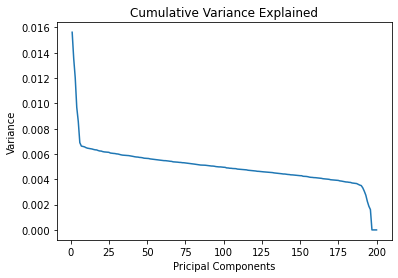

In [44]:
plt.plot(range(1,201), evr)
plt.title('Cumulative Variance Explained')
plt.ylabel('Variance')
plt.xlabel('Pricipal Components');

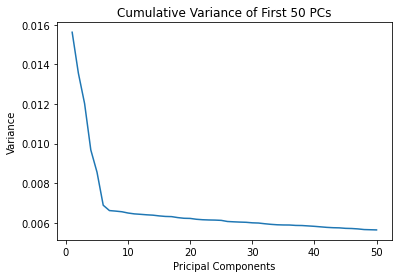

In [45]:
plt.plot(range(1, 51), evr[:50])
plt.title('Cumulative Variance of First 50 PCs')
plt.ylabel('Variance')
plt.xlabel('Pricipal Components');

### Calculate Train and Test Error

#### Run the following:
- for the first 50 principal components,
  - scale the data
  - generate the number of principal components and transform them into features
  - Using Logistic Regression with default inputs, generate train and test predictions through 10-fold cross validation
    - *Hint:* use `sklearn.cross_validate`
    - *Level up:* ideally, you would scale and PCA on each training fold (why?).  Use a pipeline!
  - graph the means of the train and test predictions for each number of principal component

#### Interpret the graph  
- How many principle components should we choose based on this?
- Is overfitting or underfitting a problem?

#### Level up
- Repeat the above but don't scale the data.  Intepret the results.

In [43]:
# Initialize lists to store cv results
train_means = []
test_means = []

# Make a new pipeline for each value of n_components [1, 50]
for n in range(1, 51):
    pipe = Pipeline(steps=[
        ('ss', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('logreg', LogisticRegression())
    ])
    # Cross validation
    results = cross_validate(estimator=pipe, X=X_train, y=y_train, return_train_score=True)
    
    # Add scores to the lists
    train_means.append(results['train_score'].mean())
    test_means.append(results['test_score'].mean())

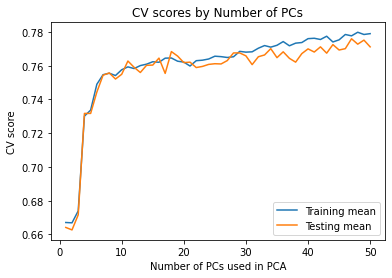

In [50]:
plt.plot(range(1, 51), train_means, label='Training mean')
plt.plot(range(1, 51), test_means, label='Testing mean')
plt.legend()
plt.title('CV scores by Number of PCs')
plt.ylabel('CV score')
plt.xlabel('Number of PCs used in PCA');

**Conclusion:**

Based on this graph, we should choose around 20 PCs. After this, further improvements in CV score are offset by potential issues with overfitting.